In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.python.keras import Model

from dataset.create_dataset import create_dataset


In [2]:
X, Y = create_dataset(nb = 20)

In [3]:
(x_train, x_test, y_train, y_test) = train_test_split(X.to_numpy(), Y.to_numpy(), train_size=0.75)

In [4]:
model: Model = Sequential([
    InputLayer(input_shape=(1,)),
    Dense(1)
])

model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(
    x_train,
    y_train,
    epochs=500,
    validation_split = 0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )

Epoch 1/500
1/1 [==============================] - 0s 441ms/step - loss: 20.8825 - mean_absolute_error: 3.8718 - val_loss: 32.1788 - val_mean_absolute_error: 5.5069
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 20.5855 - mean_absolute_error: 3.8407 - val_loss: 31.8827 - val_mean_absolute_error: 5.4830
Epoch 3/500
1/1 [==============================] - 0s 26ms/step - loss: 20.3019 - mean_absolute_error: 3.8104 - val_loss: 31.5950 - val_mean_absolute_error: 5.4596
Epoch 4/500
1/1 [==============================] - 0s 31ms/step - loss: 20.0312 - mean_absolute_error: 3.7808 - val_loss: 31.3152 - val_mean_absolute_error: 5.4368
Epoch 5/500
1/1 [==============================] - 0s 30ms/step - loss: 19.7727 - mean_absolute_error: 3.7518 - val_loss: 31.0431 - val_mean_absolute_error: 5.4145
Epoch 6/500
1/1 [==============================] - 0s 31ms/step - loss: 19.5258 - mean_absolute_error: 3.7236 - val_loss: 30.7786 - val_mean_absolute_error: 5.3927
Epoch 7/500
1/1

In [6]:
x_lin = tf.linspace(min(x_train), max(x_train), len(X))
y_lin = model.predict(x_lin)

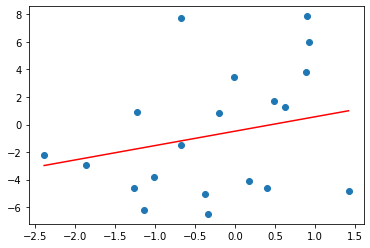

In [7]:
plt.scatter(X, Y)
plt.plot(x_lin, y_lin, color='red')
plt.show()

In [12]:
model.get_weights()

[array([[1.04281]], dtype=float32), array([-0.48341542], dtype=float32)]

In [9]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 22ms/step - loss: 24.8256 - mean_absolute_error: 4.1436


[24.825557708740234, 4.143575191497803]

In [10]:
y_pred = model.predict(x_test)

In [11]:
tf.keras.metrics.mean_squared_error(
    y_test, y_pred
)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([79.87563   ,  0.24140649,  7.891901  , 20.4867    , 15.632146  ],
      dtype=float32)>